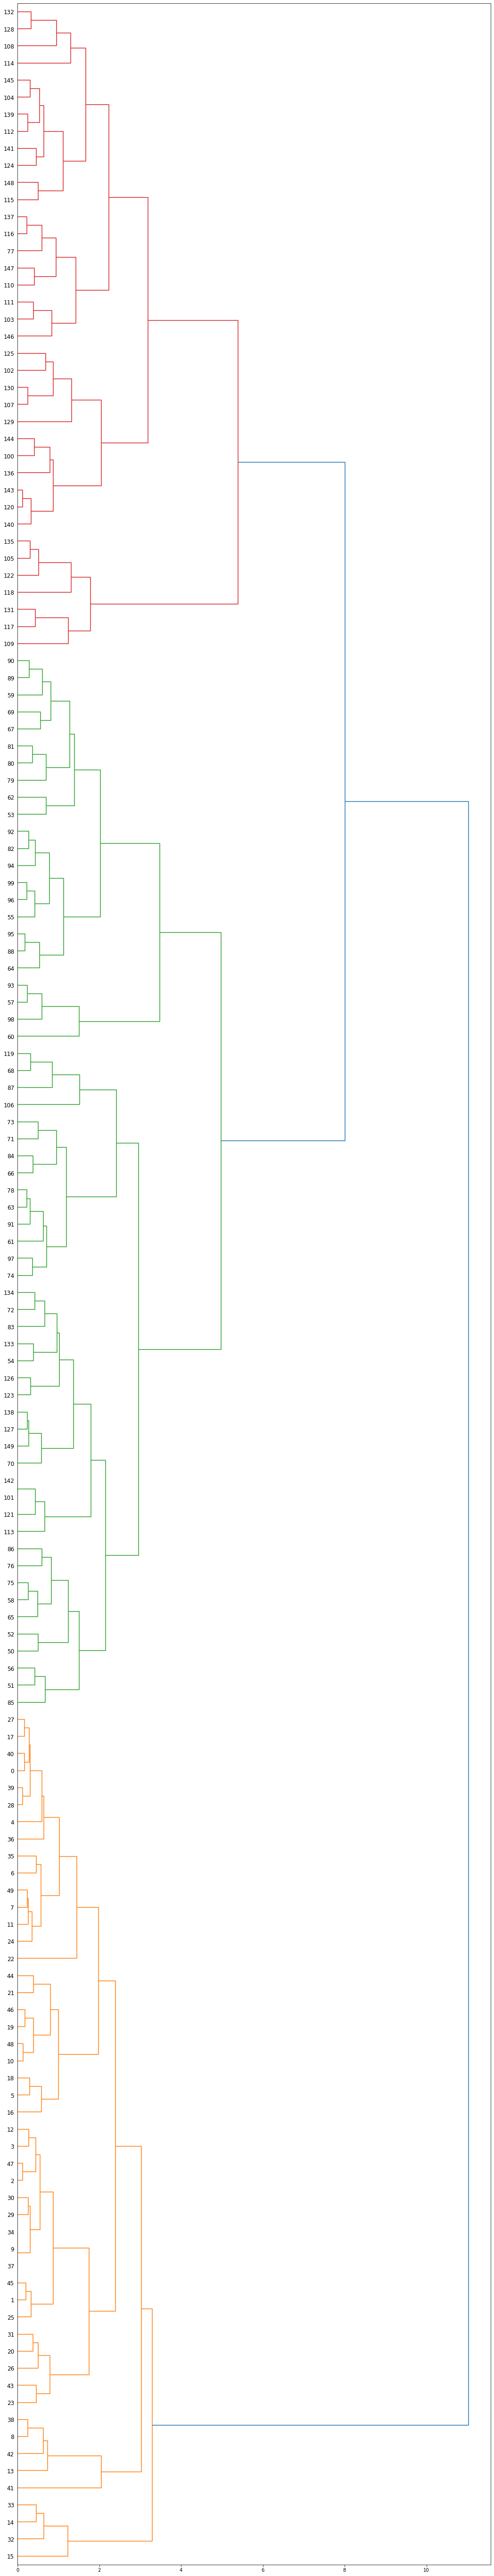

In [76]:
import numpy as np
import pandas as pd
import scipy
from scipy.cluster import hierarchy 
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster
from scipy.spatial import distance_matrix 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering 
from mpl_toolkits.mplot3d import Axes3D 
import pylab

source = pd.read_csv('Iris.csv')
df = source.drop(['Species'],axis=1)
df.head()

x = df.values[:,1:]
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[:5]

import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='maxclust')
clusters

fig = pylab.figure(figsize=(18,100))
    
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Dengan Scikit-learn

In [77]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

[[0.         0.21561354 0.16810102 ... 1.08257132 1.14907064 0.96462829]
 [0.21561354 0.         0.10157824 ... 1.08390691 1.17619813 0.95649502]
 [0.16810102 0.10157824 0.         ... 1.12088708 1.19544459 0.98859665]
 ...
 [1.08257132 1.08390691 1.12088708 ... 0.         0.226928   0.18710825]
 [1.14907064 1.17619813 1.19544459 ... 0.226928   0.         0.28409587]
 [0.96462829 0.95649502 0.98859665 ... 0.18710825 0.28409587 0.        ]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int64)

In [78]:
source


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [79]:
mapping_dict = { 0: 'Iris-setosa', 1: 'Iris-virginica', 2:'Iris-versicolor'}
source["Hierarchical_label"] = [mapping_dict[x] for x in agglom.labels_]
source['eq'] = np.where(source["Species"] == source["Hierarchical_label"], True, False)
source["cluster"] = agglom.labels_
source

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Hierarchical_label,eq,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa,True,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa,True,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa,True,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,True,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,True,0
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica,True,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,Iris-versicolor,False,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica,True,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica,True,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1152x1008 with 0 Axes>

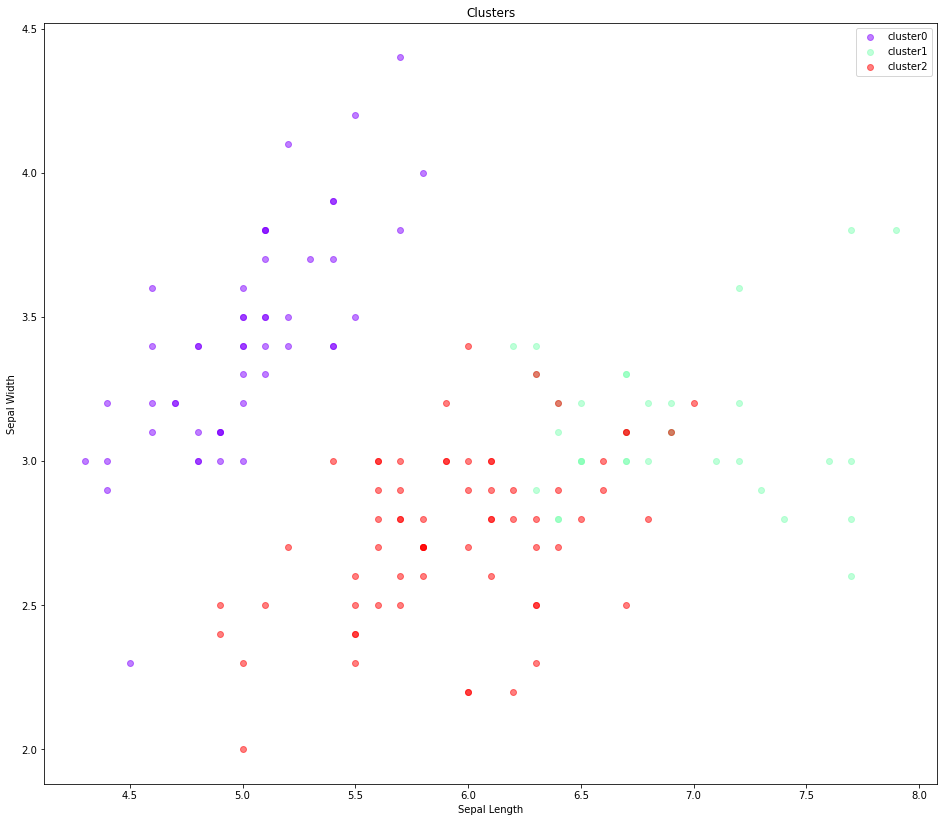

In [80]:

import matplotlib.cm as cm
import matplotlib.pyplot as plt

plt.figure(figsize=(16,14))

n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = source[source.cluster == label]
    plt.scatter(subset.SepalLengthCm, subset.SepalWidthCm, c=color, label='cluster'+str(label),alpha=0.5)


plt.legend()
plt.title('Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.show()

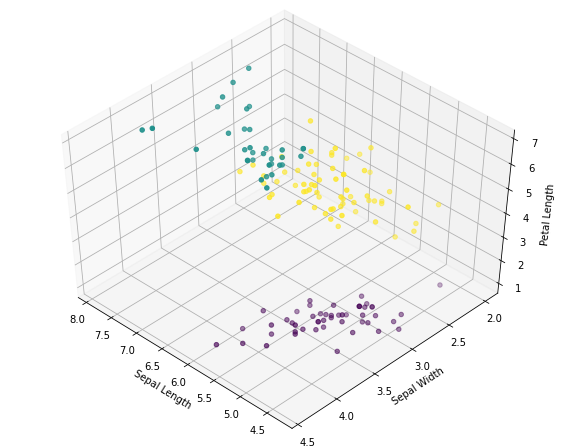

In [81]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.legend
plt.cla()
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

ax.scatter(x[:, 0], x[:, 1], x[:, 2], c= agglom.labels_.astype(np.float))